In [65]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [67]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [68]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="Ayutthaya",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),จำนวนนักท่องเที่ยวชาวไทย (คน),จำนวนนักท่องเที่ยวชาวต่างชาติ (คน),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,3069,471,70294,2030,254,1566,16137,1392,655,472,...,48.223830,37.278020,59467272,0.11918,12393.628934,1.141681e+06,205980,8723,178,143862.554
1996,3305,513,80942,2290,324,5205,19161,1626,819,595,...,45.255728,37.081286,60130190,0.11918,13253.421437,1.144784e+06,297246,8723,172,171503.917
1997,4056,474,86917,2697,382,1756,20641,2219,675,575,...,46.814732,36.564600,60846588,0.10214,13493.539750,1.145651e+06,322734,8723,170,179223.451
1998,4805,395,84878,3388,420,1166,22362,2306,666,585,...,42.303171,36.111727,61585103,0.17525,13536.724929,1.145807e+06,327318,10418,170,180611.806
1999,4030,302,92332,2974,503,1397,22431,2483,685,836,...,44.267746,36.378900,62298569,0.24836,13824.290188,1.146844e+06,357842,21707,168,189856.706


In [69]:
df.shape

(24, 31)

In [70]:
df.columns

Index(['Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
       'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
       'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
       'มูลค่าเพิ่มของ

## Regression before Feature Selection

In [71]:
input_vars = ['Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
       'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
       'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
       'มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี)',
       'จำนวนประชากรทั้งหมด (คน)',
       'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี)',
       'รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท)',
       'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
       'จำนวนนักท่องเที่ยวชาวไทย (คน)', 'จำนวนนักท่องเที่ยวชาวต่างชาติ (คน)',
       'จำนวนโรงงานอุตสาหกรรม (โรงงาน)',]
len(input_vars)

30

In [72]:
X1 = df[input_vars]
y1 = df['GPP Per capita (Baht)']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X1_train, y1_train)
y_pred = lm.predict(X1_test)
#[np.sqrt(metrics.mean_squared_error(y1_test,y_pred)),metrics.r2_score(y1_test,y_pred)]

In [73]:
#dataframe
table1 = pd.DataFrame({'R_square': [metrics.r2_score(y1_test,y_pred)], 'RMSE': [np.sqrt(metrics.mean_squared_error(y1_test,y_pred))]}, index=['Linear Regression'])
table1

,R_square,RMSE
Linear Regression,0.997317,4948.120106


## Filter Methods

#### Low Variance Filtering

In [74]:
df1 = df.copy()
df1.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),จำนวนนักท่องเที่ยวชาวไทย (คน),จำนวนนักท่องเที่ยวชาวต่างชาติ (คน),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,3069,471,70294,2030,254,1566,16137,1392,655,472,...,48.223830,37.278020,59467272,0.11918,12393.628934,1.141681e+06,205980,8723,178,143862.554
1996,3305,513,80942,2290,324,5205,19161,1626,819,595,...,45.255728,37.081286,60130190,0.11918,13253.421437,1.144784e+06,297246,8723,172,171503.917
1997,4056,474,86917,2697,382,1756,20641,2219,675,575,...,46.814732,36.564600,60846588,0.10214,13493.539750,1.145651e+06,322734,8723,170,179223.451
1998,4805,395,84878,3388,420,1166,22362,2306,666,585,...,42.303171,36.111727,61585103,0.17525,13536.724929,1.145807e+06,327318,10418,170,180611.806
1999,4030,302,92332,2974,503,1397,22431,2483,685,836,...,44.267746,36.378900,62298569,0.24836,13824.290188,1.146844e+06,357842,21707,168,189856.706


In [75]:
df1.var()

Agriculture, forestry and fishing                                     1.214250e+07
Mining and quarrying                                                  4.678607e+05
Manufacturing                                                         6.057976e+09
Electricity, gas, steam and air conditioning supply                   4.000911e+06
Water supply sewerage, waste management and remediation activities    3.428209e+04
Construction                                                          1.774318e+06
Wholesale and retail trade and repair of motor vehicles               7.279945e+07
Transportation and storage                                            2.360573e+07
Accommodation and food service activities                             7.159928e+05
Information and communication                                         1.847017e+05
Financial and insurance activities                                    5.661816e+06
Real estate activities                                                6.069826e+05
Prof

In [76]:
# After scanning variances from all features above, set minimum variance threshold = 15 
# Note that minimum variance threshold can be set to any value

# Below is to remove features with low variances
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features with variance >= minimum variance threshold

min_var_threshold = 100000000
updated_vars = [ ]
for i in range(0,len(df[input_vars].var())):

    if df[input_vars].var()[i] >= min_var_threshold:   
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Manufacturing',
 'จำนวนประชากรทั้งหมด (คน)',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'จำนวนนักท่องเที่ยวชาวไทย (คน)',
 'จำนวนนักท่องเที่ยวชาวต่างชาติ (คน)']

In [77]:
len(updated_vars)

5

In [78]:
# Above, there are 3 features with variance >= minimum variance threshold
# Create new data frame with these 3 features and 1 output

df2 = df1[updated_vars]
#df2['จำนวนประชากรทั้งหมด (คน)']=df1['จำนวนประชากรทั้งหมด (คน)']
df2.head()

,Manufacturing,จำนวนประชากรทั้งหมด (คน),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),จำนวนนักท่องเที่ยวชาวไทย (คน),จำนวนนักท่องเที่ยวชาวต่างชาติ (คน)
Year,,,,,
1995,70294,59467272,1.141681e+06,205980,8723
1996,80942,60130190,1.144784e+06,297246,8723
1997,86917,60846588,1.145651e+06,322734,8723
1998,84878,61585103,1.145807e+06,327318,10418
1999,92332,62298569,1.146844e+06,357842,21707


In [79]:
X = df2[updated_vars]
y = df1['GPP Per capita (Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[2412.474102997466, 0.9993623035430501]

#### High Correlation Filtering

<AxesSubplot:>

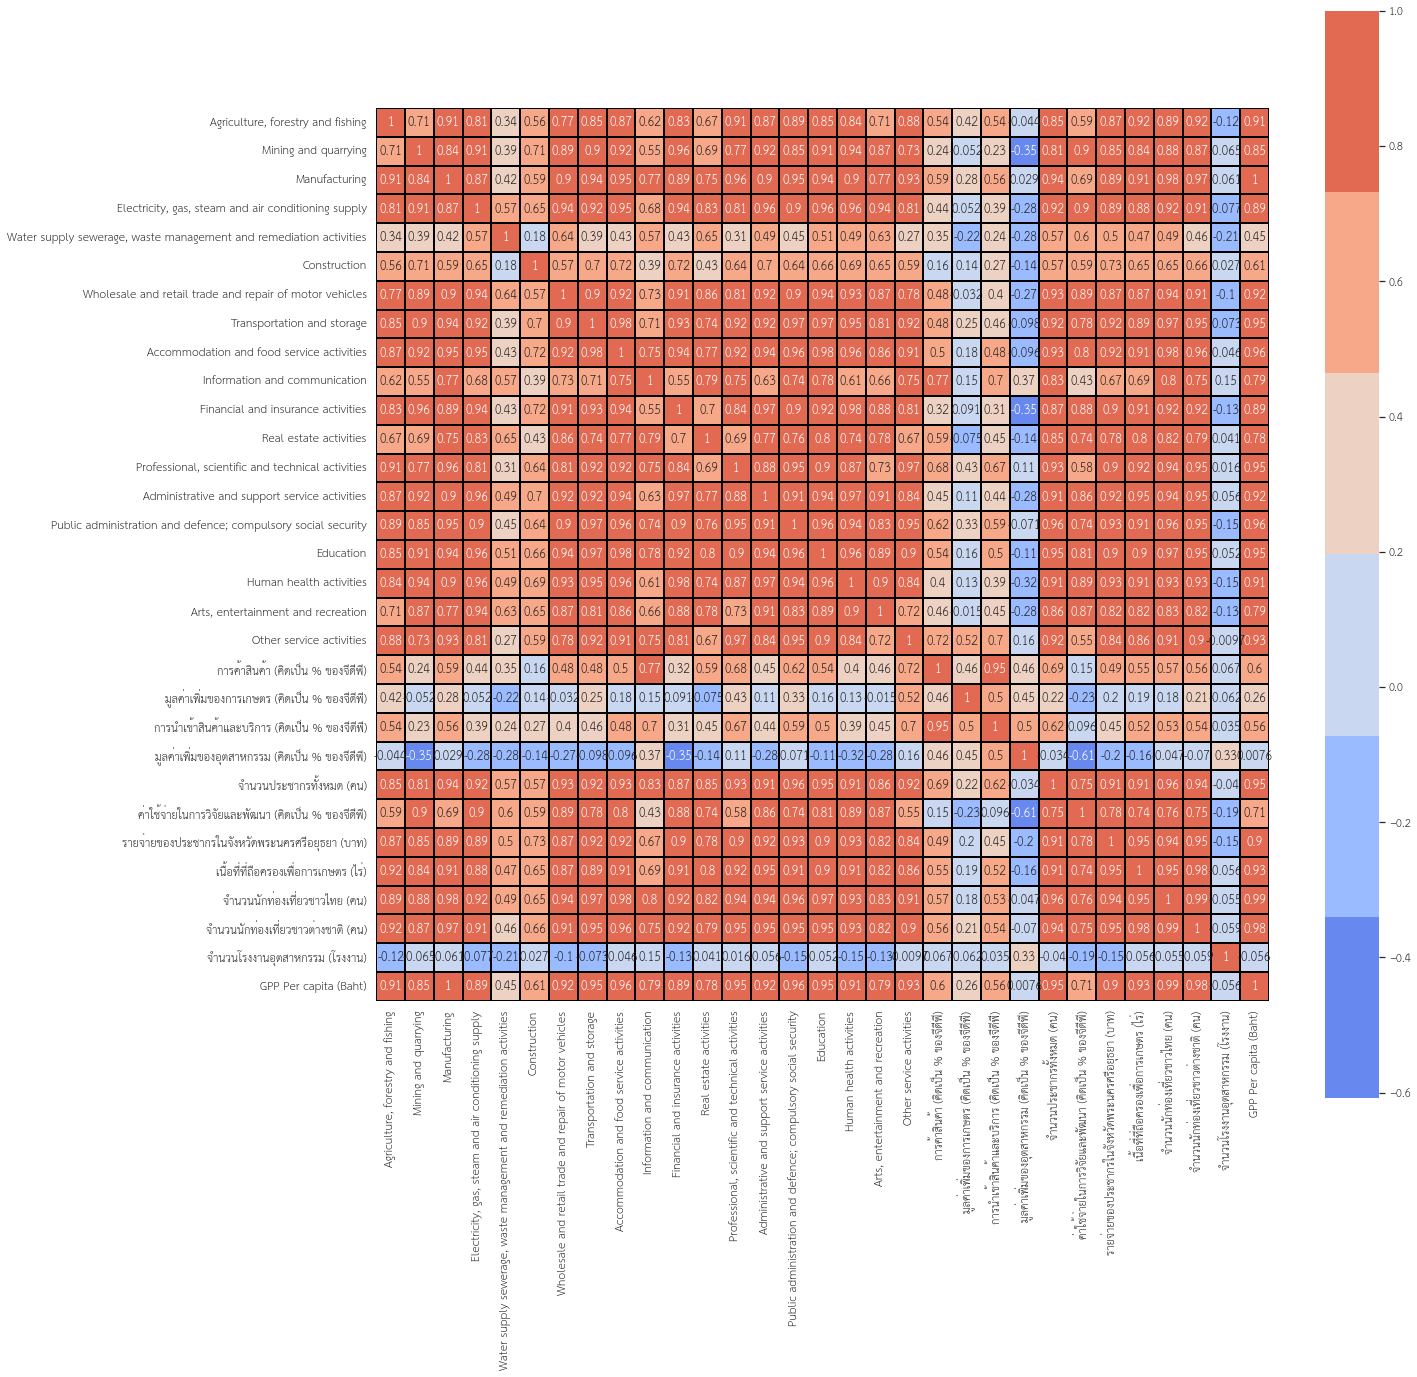

In [82]:
# Plot correlation of numerical data
df3 = df.copy()
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=True)

In [84]:
list_corr1 = df3.corr()
list_corr1

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),จำนวนนักท่องเที่ยวชาวไทย (คน),จำนวนนักท่องเที่ยวชาวต่างชาติ (คน),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
"Agriculture, forestry and fishing",1.000000,0.713210,0.907453,0.811154,0.341059,0.561732,0.766161,0.847207,0.865918,0.616459,...,0.536493,-0.044218,0.846393,0.591855,0.865135,0.923388,0.889454,0.922761,-0.120513,0.908617
Mining and quarrying,0.713210,1.000000,0.836799,0.910364,0.388102,0.712819,0.891873,0.901784,0.918472,0.545573,...,0.234329,-0.353679,0.814832,0.898332,0.851331,0.836426,0.877846,0.868887,-0.065198,0.845008
Manufacturing,0.907453,0.836799,1.000000,0.874053,0.424064,0.592387,0.903920,0.942213,0.954037,0.774175,...,0.556126,0.028780,0.941754,0.686223,0.891049,0.913027,0.978720,0.970275,-0.061169,0.998116
"Electricity, gas, steam and air conditioning supply",0.811154,0.910364,0.874053,1.000000,0.570229,0.645917,0.944699,0.922467,0.946958,0.684497,...,0.388751,-0.279549,0.915357,0.901549,0.885283,0.876604,0.922954,0.908147,-0.077430,0.892675
"Water supply sewerage, waste management and remediation activities",0.341059,0.388102,0.424064,0.570229,1.000000,0.180608,0.642743,0.390381,0.432263,0.574267,...,0.243440,-0.280432,0.571832,0.595533,0.504323,0.465546,0.488836,0.460078,-0.213828,0.452850
Construction,0.561732,0.712819,0.592387,0.645917,0.180608,1.000000,0.568314,0.699680,0.716936,0.392361,...,0.265165,-0.144448,0.566475,0.594611,0.729481,0.653682,0.652321,0.658559,0.026594,0.606306
Wholesale and retail trade and repair of motor vehicles,0.766161,0.891873,0.903920,0.944699,0.642743,0.568314,1.000000,0.901919,0.923194,0.728434,...,0.399735,-0.269648,0.932202,0.888107,0.871647,0.865643,0.935830,0.906606,-0.100341,0.920363
Transportation and storage,0.847207,0.901784,0.942213,0.922467,0.390381,0.699680,0.901919,1.000000,0.984716,0.710406,...,0.456007,-0.097945,0.923065,0.779995,0.921300,0.889061,0.965210,0.947416,-0.073405,0.948927
Accommodation and food service activities,0.865918,0.918472,0.954037,0.946958,0.432263,0.716936,0.923194,0.984716,1.000000,0.746229,...,0.482435,-0.095703,0.932810,0.799880,0.922714,0.910719,0.978619,0.964856,-0.045760,0.962440
Information and communication,0.616459,0.545573,0.774175,0.684497,0.574267,0.392361,0.728434,0.710406,0.746229,1.000000,...,0.703267,0.374266,0.833372,0.431354,0.665207,0.685677,0.795099,0.750762,0.150469,0.788062


In [88]:
for i, j in list_corr1.items():
    print("col_name:",i, "\ndata:",j)

col_name: Agriculture, forestry and fishing 
data: Agriculture, forestry and fishing                                     1.000000
Mining and quarrying                                                  0.713210
Manufacturing                                                         0.907453
Electricity, gas, steam and air conditioning supply                   0.811154
Water supply sewerage, waste management and remediation activities    0.341059
Construction                                                          0.561732
Wholesale and retail trade and repair of motor vehicles               0.766161
Transportation and storage                                            0.847207
Accommodation and food service activities                             0.865918
Information and communication                                         0.616459
Financial and insurance activities                                    0.833615
Real estate activities                                                0.672886
P